<a href="https://colab.research.google.com/github/kavithabakshi/ADNI/blob/master/ADNI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
file = "https://github.com/kavithabakshi/ADNI/blob/master/Data/ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080703170241434_S51039_I112538.nii?raw=true"

In [1]:
pip install dltk

     |████████████████████████████████| 296kB 4.9MB/s 
     |████████████████████████████████| 42.5MB 650kB/s 
     |████████████████████████████████| 337kB 30.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/9d/72/c6/8d739d38edc23d5f5e58aeaeff23df0236bb2449edccf93898
Successfully built dltk
ERROR: ipython 5.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.4, but you'll have prompt-toolkit 2.0.9 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.16
    Uninstalling prompt-toolkit-1.0.16:
      Successfully uninstalled prompt-toolkit-1.0.16


In [0]:
import SimpleITK as sitk
import os
import tensorflow as tf
import pandas as pd
import time

from matplotlib import pyplot as plt
from dltk.io.augmentation import *
from dltk.io.preprocessing import *

In [3]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 4.9MB/s 


In [17]:
ADNI_csv = 'https://raw.githubusercontent.com/kavithabakshi/ADNI/master/ADNI1_Complete_1Yr_1.5T_4_14_2019.csv'
df = pd.read_csv(ADNI_csv, delimiter= ';')
#filename = np.array(df['FileName'])
#print(df)
link = 'https://drive.google.com/open?id=1JWZGDUIC6JGNG8s6NuRPNk534Qpr2Dru'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Gtest.nii')  
sitk_t1 = sitk.ReadImage('Gtest.nii')
t1 = sitk.GetArrayFromImage(sitk_t1)
t1 = t1.reshape(1,160,192,192)
downloaded.GetContentFile('Gtest1.nii')  
sitk_t2 = sitk.ReadImage('Gtest1.nii')
t2 = sitk.GetArrayFromImage(sitk_t2)
downloaded.GetContentFile('Gtest2.nii')  
sitk_t3 = sitk.ReadImage('Gtest2.nii')
t3 = sitk.GetArrayFromImage(sitk_t3)
print(t1.shape)
#sitk.Show(sitk_t1, title="Visible Human Head", debugOn=True)
#sitk.Show(inputImage)
# Dataset is now stored in a Pandas Dataframe
#grid_image = sitk.GridSource(t1, outputPixelType=sitk.sitkUInt16, size=(512,512),
#                             sigma=(0.1,0.1), gridSpacing=(20.0,20.0))

# Procedural interface, using the default image viewer (Fiji/ImageJ) or
# any viewer specified by the SITK_SHOW_COMMAND environment variable.
#sitk.Show(sitk_t1, title = "grid using Show function", debugOn = True)
#plt.imshow(t1)
#image_viewer = sitk.ImageViewer()
#image_viewer.SetTitle('grid using ImageViewer class')

# Use the default image viewer.
#image_viewer.Execute(grid_image)
 

1JWZGDUIC6JGNG8s6NuRPNk534Qpr2Dru
(1, 160, 192, 192)


In [46]:
from keras.models import Sequential
from keras.layers import Dense, Conv3D, Flatten, AveragePooling2D, Conv2D
train_data = {}
train_labels = {}
# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(15, kernel_size=5, activation='relu', 
               input_shape=(160,192,192)))
model.add(AveragePooling2D(10))

model.add(Conv2D(10, kernel_size=3, activation='relu'))
model.add(AveragePooling2D(10))

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=60, activation='relu'))

model.add(Dense(units=3, activation = 'softmax')) 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
train_data[0] = t1
train_data[1] = t2
train_data[2] = t3
train_labels[0] = 'MCI'
train_labels[1] = 'CN'
train_labels[2] = 'AD'
y = pd.DataFrame([0,1,2])
print(y)
X=[t1,t2,t3]
# Fit the model on a training set
model.fit(t1, y, epochs=3)

   0
0  0
1  1
2  2


ValueError: ignored

192


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


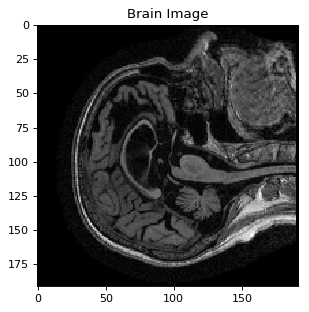

NameError: ignored

In [15]:
title="Brain Image"
margin=0.05
dpi=80
spacing = sitk_t1.GetSpacing()
if t1.ndim == 3:
        # fastest dim, either component or x
        c = t1.shape[-1]
        
        # if the number of components is 3 or 4 consider it an RGB image
        if not c in (3,4):
            t1 = t1[t1.shape[0]//2,:,:]
    
        elif t1.ndim == 4:
            c = t1.shape[-1]
            # take a z-slice
            t1 = t1[t1.shape[0]//2,:,:,:]
        

xsize = t1.shape[1]
ysize = t1.shape[0]
print(ysize)
#figsize = (1 + margin) * xsize / dpi, (1 + margin) * ysize / dpi
plt.figure(dpi=dpi, tight_layout=True)
ax = plt.gca()
#extent = (0, xsize * spacing[0], ysize * spacing[1], 0)
t = ax.imshow(t1, interpolation=None)
t.set_cmap("gray")
plt.title(title)
plt.show()
#print(t1[0:5])
t1_flipped = flip(t1.copy(), axis=1)
plt.figure(figsize=figsize, dpi=dpi, tight_layout=True)
ax = plt.gca()
extent = (0, xsize * spacing[0], ysize * spacing[1], 0)
tflip = ax.imshow(t1_flipped, extent=extent, interpolation=None)
#t.set_cmap("gray")
plt.title("Brain Image - Flipped")
plt.show()
t1 = whitening(t1)
plt.figure(figsize=figsize, dpi=dpi, tight_layout=True)
ax = plt.gca()
extent = (0, xsize * spacing[0], ysize * spacing[1], 0)
t = ax.imshow(t1, extent=extent, interpolation=None)
t.set_cmap("gray")
plt.title("Brain Image - Whitened")
plt.show()
#print(t1)
t1_normalized = normalise_zero_one(t1)
plt.figure(figsize=figsize, dpi=dpi, tight_layout=True)
ax = plt.gca()
extent = (0, xsize * spacing[0], ysize * spacing[1], 0)
t = ax.imshow(t1_normalized, extent=extent, interpolation=None)
t.set_cmap("gray")
plt.title("Brain Image - Normalized")
plt.show()
#print(t1)

In [0]:
#myshow(t1_fn, title="Ganesha", margin=0.05, dpi=80)

In [0]:
#

In [0]:
#subject_id = meta_data[0]
#data_path = '/content/ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080703170241434_S51039_I112538.nii'
#data_path = 'https://github.com/kavithabakshi/ADNI/blob/master/Data/'
#t1_fn = os.path.join(data_path, '{}/ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080703170241434_S51039_I112538.nii')
# A path to a T1-weighted brain .nii image:
#t1_fn = '../../ADNI/Data/ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080703170241434_S51039_I112538.nii'
#https://github.com/kavithabakshi/ADNI/blob/master/Gtest.gz?raw=true
t1_fn = 'ttps://github.com/kavithabakshi/ADNI/blob/master/Gtest.nii'
# Read the .nii image containing a brain volume with SimpleITK and get 
        # the numpy array:
#sitk_t1 = sitk.ReadImage(t1_fn)
#t1 = sitk.GetArrayFromImage(sitk_t1)
sample = 'https://raw.githubusercontent.com/kavithabakshi/ADNI/master/ADNI1_Complete_1Yr_1.5T_4_14_2019.csv'
t1_fn = 'Data/ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080703170241434_S51039_I112538.nii'
sitk_t1 = sitk.ReadImage(t1_fn)
t1 = sitk.GetArrayFromImage(sitk_t1)
df = pd.read_csv(sample, delimiter = ';')

RuntimeError: ignored

TypeError: ignored

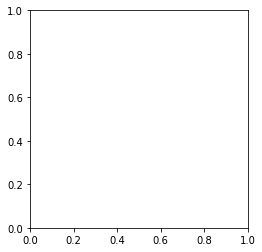

In [0]:
plt.imshow(sitk_t1)